# Getting Started

Each robot records time series from six different
sensors. For each sample denoted by a different id we are going to classify if the robot reports a failure or not. From a
machine learning point of view, our goal is to classify each group of time series

In [46]:
%matplotlib inline
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# EDA

In [47]:
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [48]:
timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


In [49]:
timeseries['id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88])

In [50]:
timeseries.shape

(1320, 8)

In [51]:
timeseries.dtypes

id      int64
time    int64
F_x     int64
F_y     int64
F_z     int64
T_x     int64
T_y     int64
T_z     int64
dtype: object

In [52]:
timeseries.describe()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,44.500000,7.000000,-2.345455,8.913636,-128.214394,-39.028030,-4.517424,0.868182
std,25.411399,4.322131,50.367960,45.845475,346.816091,147.269399,101.609308,18.317250
min,1.000000,0.000000,-260.000000,-353.000000,-1547.000000,-672.000000,-646.000000,-137.000000
25%,22.750000,3.000000,-4.000000,-2.000000,-117.250000,-39.250000,-13.000000,-1.000000
50%,44.500000,7.000000,-1.000000,1.000000,46.000000,-9.000000,-3.000000,0.000000
75%,66.250000,11.000000,3.000000,11.000000,60.000000,-1.000000,3.000000,2.000000
max,88.000000,14.000000,342.000000,236.000000,157.000000,686.000000,601.000000,123.000000


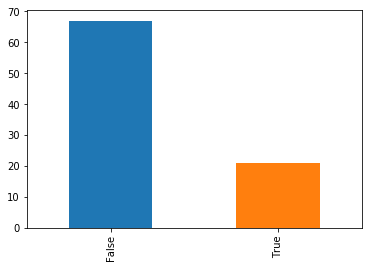

In [53]:
# already showing imbalance class
pd.Series(y.value_counts()).plot.bar()

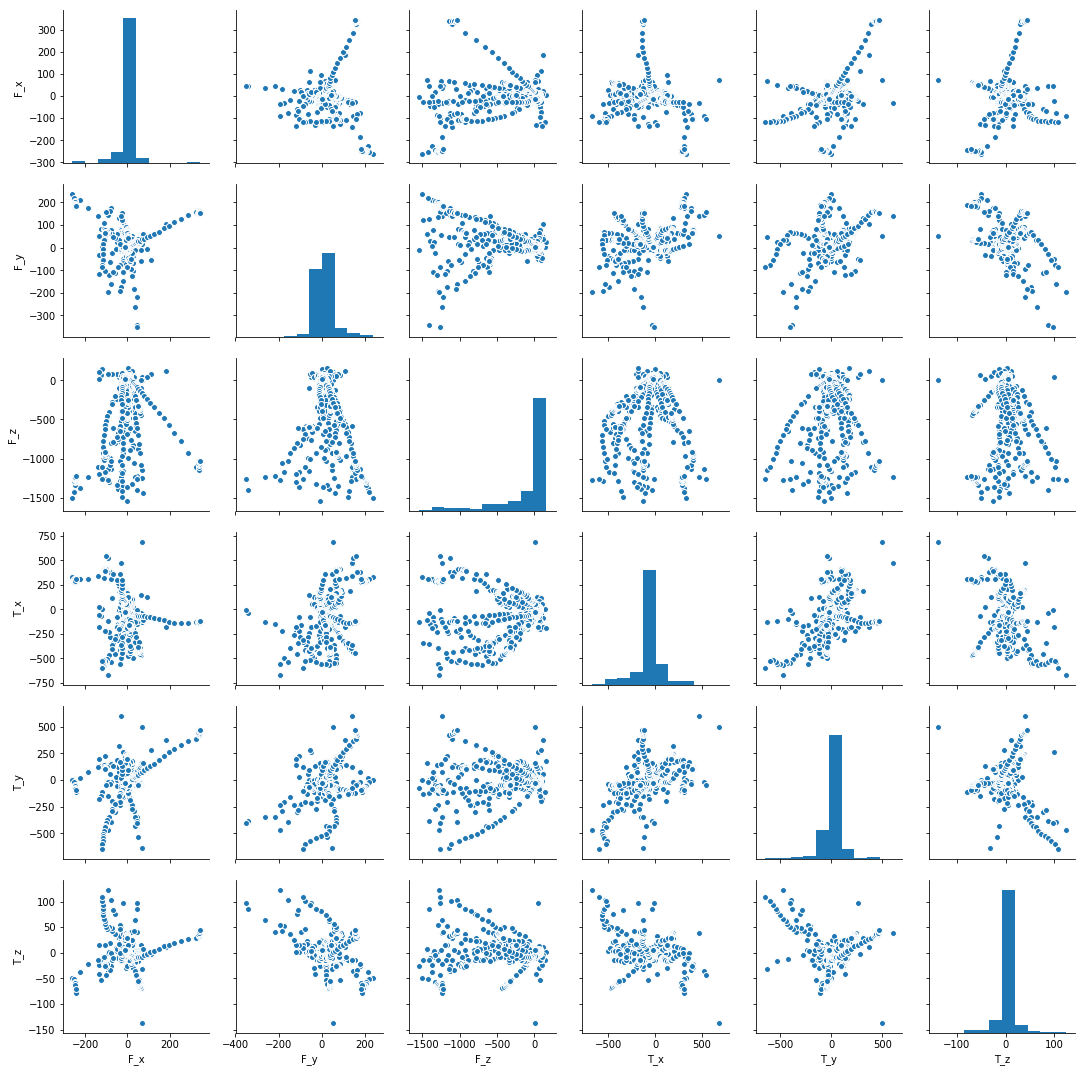

In [54]:
sns.pairplot(timeseries[timeseries.columns[2:]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae7e585c0>,
      dtype=object)

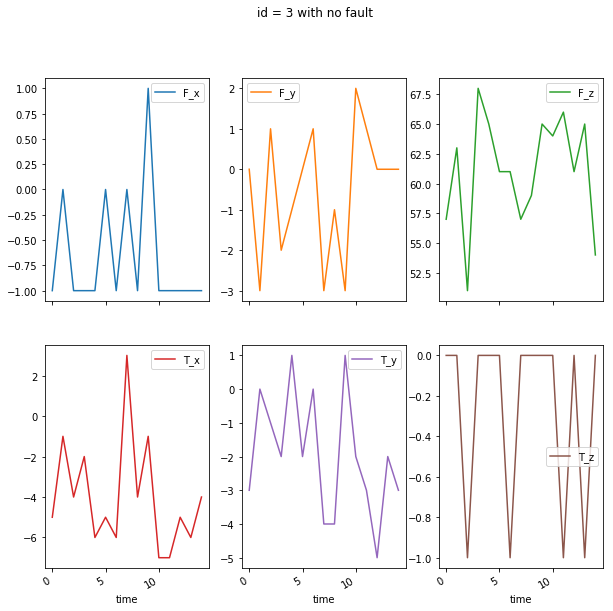

In [55]:
timeseries[timeseries['id'] == 3][timeseries.columns[1:]].plot(x='time', subplots=True, 
                                                               sharex=True, figsize=(10,10), layout=(2, 3),
                                                              title = "id = 3 with no fault"
                                                              )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae7cb69e8>,
      dtype=object)

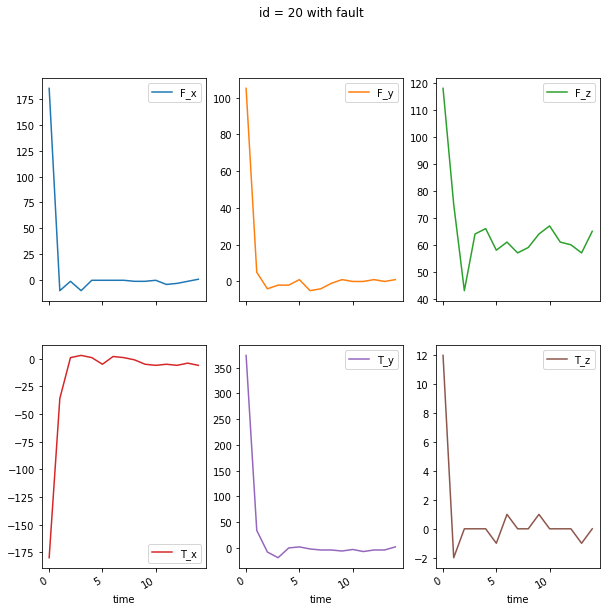

In [56]:
timeseries[timeseries['id'] == 20][timeseries.columns[1:]].plot(x='time', subplots=True, 
                                                               sharex=True, figsize=(10,10), layout=(2, 3),
                                                              title = "id = 20 with fault"
                                                              )

## Findings
* clear difference in pattern over time of fault and no fault
* how do we cluster these ?

For successful machine learning we have to put these differences into numbers. For this, tsfresh comes into place. It allows us to automatically extract over 1200 features from those six different time series for each robot.

# Feature Extraction

In [72]:
from tsfresh import extract_features, select_features, extract_relevant_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [58]:
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 20/20 [00:10<00:00,  2.47it/s]


In [59]:
extracted_features.columns

Index(['F_x__abs_energy', 'F_x__absolute_sum_of_changes',
       'F_x__agg_autocorrelation__f_agg_"mean"__maxlag_40',
       'F_x__agg_autocorrelation__f_agg_"median"__maxlag_40',
       'F_x__agg_autocorrelation__f_agg_"var"__maxlag_40',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"',
       'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"',
       ...
       'T_z__symmetry_looking__r_0.9',
       'T_z__symmetry_looking__r_0.9500000000000001',
       'T_z__time_reversal_asymmetry_statistic__lag_1',
       'T_z__time_reversal_asymmetry_statistic__lag_2',
       'T_z__time_reversal_asymmetry_statistic__lag_3',
       'T_z__value_count__value_-1', 'T_z__value_count__value_0',
       'T_z__value_count__value_1', 'T_z__varian

In [60]:
extracted_features.head()

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_x__agg_autocorrelation__f_agg_""median""__maxlag_40","F_x__agg_autocorrelation__f_agg_""var""__maxlag_40","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""stderr""",...,T_z__sample_entropy,T_z__skewness,T_z__spkt_welch_density__coeff_2,T_z__spkt_welch_density__coeff_5,T_z__spkt_welch_density__coeff_8,T_z__standard_deviation,T_z__sum_of_reoccurring_data_points,T_z__sum_of_reoccurring_values,T_z__sum_values,T_z__symmetry_looking__r_0.0,T_z__symmetry_looking__r_0.05,T_z__symmetry_looking__r_0.1,T_z__symmetry_looking__r_0.15000000000000002,T_z__symmetry_looking__r_0.2,T_z__symmetry_looking__r_0.25,T_z__symmetry_looking__r_0.30000000000000004,T_z__symmetry_looking__r_0.35000000000000003,T_z__symmetry_looking__r_0.4,T_z__symmetry_looking__r_0.45,T_z__symmetry_looking__r_0.5,T_z__symmetry_looking__r_0.55,T_z__symmetry_looking__r_0.6000000000000001,T_z__symmetry_looking__r_0.65,T_z__symmetry_looking__r_0.7000000000000001,T_z__symmetry_looking__r_0.75,T_z__symmetry_looking__r_0.8,T_z__symmetry_looking__r_0.8500000000000001,T_z__symmetry_looking__r_0.9,T_z__symmetry_looking__r_0.9500000000000001,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-1,T_z__value_count__value_0,T_z__value_count__value_1,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,NaN,NaN,NaN,NaN,-0.166667,-0.866025,-0.5,0.288675,-0.9,-1.0,-0.1,0.0,NaN,NaN,NaN,NaN,-0.833333,-0.866025,-0.1,5.773503e-02,-1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,inf,0.000

remove all NaN values (that were created by feature calculators, than can not be used on the given data, e.g. because
it has too low statistics) and select only the relevant features

In [61]:
impute(extracted_features)

 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_x__agg_autocorrelation__f_agg_""median""__maxlag_40","F_x__agg_autocorrelation__f_agg_""var""__maxlag_40","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""stderr""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""slope""","F_x__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""intercept""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""slope""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""stderr""",...,T_z__sample_entropy,T_z__skewness,T_z__spkt_welch_density__coeff_2,T_z__spkt_welch_density__coeff_5,T_z__spkt_welch_density__coeff_8,T_z__standard_deviation,T_z__sum_of_reoccurring_data_points,T_z__sum_of_reoccurring_values,T_z__sum_values,T_z__symmetry_looking__r_0.0,T_z__symmetry_looking__r_0.05,T_z__symmetry_looking__r_0.1,T_z__symmetry_looking__r_0.15000000000000002,T_z__symmetry_looking__r_0.2,T_z__symmetry_looking__r_0.25,T_z__symmetry_looking__r_0.30000000000000004,T_z__symmetry_looking__r_0.35000000000000003,T_z__symmetry_looking__r_0.4,T_z__symmetry_looking__r_0.45,T_z__symmetry_looking__r_0.5,T_z__symmetry_looking__r_0.55,T_z__symmetry_looking__r_0.6000000000000001,T_z__symmetry_looking__r_0.65,T_z__symmetry_looking__r_0.7000000000000001,T_z__symmetry_looking__r_0.75,T_z__symmetry_looking__r_0.8,T_z__symmetry_looking__r_0.8500000000000001,T_z__symmetry_looking__r_0.9,T_z__symmetry_looking__r_0.9500000000000001,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-1,T_z__value_count__value_0,T_z__value_count__value_1,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.166667,-0.866025,-0.5,0.288675,-0.9,-1.0,-0.1,0.0,0.0,0.0,0.0,0.0,-0.833333,-0.866025,-0.1,5.773503e-02,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.555348,

In [62]:
features_filtered = select_features(extracted_features, y)

In [65]:
features_filtered.shape

(88, 631)

In [66]:
features_filtered.columns

Index(['F_x__value_count__value_-1', 'F_x__abs_energy',
       'F_x__range_count__max_1__min_-1', 'F_y__abs_energy', 'T_y__variance',
       'T_y__standard_deviation', 'F_x__fft_coefficient__coeff_1__attr_"abs"',
       'T_y__fft_coefficient__coeff_1__attr_"abs"', 'T_y__abs_energy',
       'F_z__standard_deviation',
       ...
       'T_z__large_standard_deviation__r_0.35000000000000003',
       'T_z__quantile__q_0.9',
       'F_z__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"intercept"',
       'T_x__agg_autocorrelation__f_agg_"mean"__maxlag_40',
       'F_y__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.8',
       'T_x__spkt_welch_density__coeff_5',
       'T_y__agg_linear_trend__f_agg_"min"__chunk_len_5__attr_"intercept"',
       'F_y__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.2',
       'F_z__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"',
       'F_z__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.4'],
      dtype='object', 

In [68]:
features_filtered.head()

variable,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__variance,T_y__standard_deviation,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,"F_z__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""",F_z__variance,F_x__standard_deviation,F_x__variance,F_x__ratio_value_number_to_time_series_length,T_x__standard_deviation,T_x__variance,"T_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_2__attr_""abs""",F_x__cid_ce__normalize_True,F_x__autocorrelation__lag_1,F_x__partial_autocorrelation__lag_1,T_y__percentage_of_reoccurring_values_to_all_values,"T_y__fft_coefficient__coeff_4__attr_""abs""",T_x__ratio_value_number_to_time_series_length,"F_z__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_y__fft_coefficient__coeff_0__attr_""abs""",T_y__percentage_of_reoccurring_datapoints_to_all_datapoints,"T_y__fft_coefficient__coeff_3__attr_""abs""","F_x__fft_coefficient__coeff_2__attr_""abs""",T_x__abs_energy,"T_y__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""","F_z__fft_coefficient__coeff_1__attr_""abs""","F_y__fft_coefficient__coeff_1__attr_""abs""","T_x__fft_coefficient__coeff_5__attr_""abs""","T_x__fft_coefficient__coeff_2__attr_""abs""","F_x__fft_coefficient__coeff_0__attr_""abs""",...,"T_y__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4",F_z__count_above_mean,F_z__ar_coefficient__k_10__coeff_0,"T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","F_y__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4",F_x__count_below_mean,F_z__time_reversal_asymmetry_statistic__lag_2,"T_z__fft_aggregated__aggtype_""variance""",F_z__maximum,"F_z__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4","T_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""",T_x__number_peaks__n_1,T_y__number_cwt_peaks__n_1,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_5","F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_2",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__ar_coefficient__k_10__coeff_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9,"F_z__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","T_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8",T_x__spkt_welch_density__coeff_5,"T_y__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","F_z__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4"
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.0,14.0,15.0,13.0,0.222222,0.471405,1.000000,1.165352,10.0,1.203698,0.65,1.448889,0.249444,0.062222,0.133333,0.339935,0.115556,1.338261,0.870796,5.669467,-0.081633,-0.081633,1.000000,4.165352,0.133333,61.0,13.0,1.000000,4.440892e-16,1.000000,125.0,0.21,1.033838,1.827091,1.000000,0.209057,14.0,...,-1.0,0.000000,10.0,-0.219421,0.000000,0.0,0.000000,14.0,2181.909091,4.909978,64.0,0.000000,-3.000000,1.0,4.0,0.0,0.0,-3.0,1.0,-0.751682,-0.310265,-1.0,-596.000000,0.125000,-1.0,-1.0,0.0,0.0,0.0,62.833333,-0.095589,0.209184,0.037795,-1.000000,0.000000,63.0,0.000000
2,7.0,25.0,13.0,76.0,4.222222,2.054805,0.624118,6.020261,90.0,4.333846,19.84,18.782222,0.956847,0.915556,0.200000,3.422799,11.715556,5.1385

In [69]:
features_filtered_direct = extract_relevant_features(timeseries, y, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 20/20 [00:11<00:00,  2.50it/s]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [70]:
features_filtered_direct.head()

variable,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__variance,T_y__standard_deviation,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,"F_z__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""",F_z__variance,F_x__standard_deviation,F_x__variance,F_x__ratio_value_number_to_time_series_length,T_x__standard_deviation,T_x__variance,"T_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_2__attr_""abs""",F_x__cid_ce__normalize_True,F_x__autocorrelation__lag_1,F_x__partial_autocorrelation__lag_1,T_y__percentage_of_reoccurring_values_to_all_values,"T_y__fft_coefficient__coeff_4__attr_""abs""",T_x__ratio_value_number_to_time_series_length,"F_z__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_y__fft_coefficient__coeff_0__attr_""abs""",T_y__percentage_of_reoccurring_datapoints_to_all_datapoints,"T_y__fft_coefficient__coeff_3__attr_""abs""","F_x__fft_coefficient__coeff_2__attr_""abs""",T_x__abs_energy,"T_y__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""","F_z__fft_coefficient__coeff_1__attr_""abs""","F_y__fft_coefficient__coeff_1__attr_""abs""","T_x__fft_coefficient__coeff_5__attr_""abs""","T_x__fft_coefficient__coeff_2__attr_""abs""","F_x__fft_coefficient__coeff_0__attr_""abs""",...,"T_y__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4",F_z__count_above_mean,F_z__ar_coefficient__k_10__coeff_0,"T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","F_y__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4",F_x__count_below_mean,F_z__time_reversal_asymmetry_statistic__lag_2,"T_z__fft_aggregated__aggtype_""variance""",F_z__maximum,"F_z__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4","T_x__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""",T_x__number_peaks__n_1,T_y__number_cwt_peaks__n_1,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_5","F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_2",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__ar_coefficient__k_10__coeff_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9,"F_z__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","T_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8",T_x__spkt_welch_density__coeff_5,"T_y__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","F_z__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4"
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.0,14.0,15.0,13.0,0.222222,0.471405,1.000000,1.165352,10.0,1.203698,0.65,1.448889,0.249444,0.062222,0.133333,0.339935,0.115556,1.338261,0.870796,5.669467,-0.081633,-0.081633,1.000000,4.165352,0.133333,61.0,13.0,1.000000,4.440892e-16,1.000000,125.0,0.21,1.033838,1.827091,1.000000,0.209057,14.0,...,-1.0,0.000000,10.0,-0.219421,0.000000,0.0,0.000000,14.0,2181.909091,4.909978,64.0,0.000000,-3.000000,1.0,4.0,0.0,0.0,-3.0,1.0,-0.751682,-0.310265,-1.0,-596.000000,0.125000,-1.0,-1.0,0.0,0.0,0.0,62.833333,-0.095589,0.209184,0.037795,-1.000000,0.000000,63.0,0.000000
2,7.0,25.0,13.0,76.0,4.222222,2.054805,0.624118,6.020261,90.0,4.333846,19.84,18.782222,0.956847,0.915556,0.200000,3.422799,11.715556,5.1385

# Modelling

In [76]:
extracted_features.shape

(88, 4764)

In [77]:
features_filtered.shape

(88, 631)

In [71]:
features_filtered_direct.shape

(88, 631)

In [74]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(extracted_features, features_filtered_direct, y, test_size=.4)

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float, int or None, optional (default=0.25)
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. By default, the value is set to 0.25.
    The default will change in version 0.21. It will remain 0.25 only
    if ``train_size`` is unspecified, o